# Data Preparation

> ### Import Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

> ### Connecting with **PostgreSQL** Data-Base

In [15]:
from sqlalchemy import create_engine

"""Connection Details"""

user = "postgres"  # username
password = "tictok#2020"  # password
host = "localhost"  # server IP
port = "5432"  # port no
database = "financial_risk_analytics"  # Data-Base name

try:
    engine = create_engine(
        f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
    )
    with engine.connect() as connection:
        print("Successfully connected to PostgreSQL Data-Base")

except Exception as exc:
    print("Error while connecting to PostgreSQL", exc)

Successfully connected to PostgreSQL Data-Base


>### Loading Data-Set

In [16]:
sql_query = """
SELECT
    pos.position_id AS serial_number,
    prt.portfolio_name,
    prt.manager_name,
    prt.inception_date,
    prt.total_value_usd,
    ast.asset_class,
    ast.rating,
    ast.sector,
    ast.volatility,
    pos.region,
    pos.trade_date,
    pos.exposure_value,
    pos.exposure_limit,
    pos.return_rate
FROM
    positions pos
    JOIN portfolios prt ON prt.portfolio_id = pos.portfolio_id
    JOIN assets ast ON ast.asset_id = pos.asset_id
"""

df = pd.read_sql(sql=sql_query, con=engine)
df.head()

,serial_number,portfolio_name,manager_name,inception_date,total_value_usd,asset_class,rating,sector,volatility,region,trade_date,exposure_value,exposure_limit,return_rate
0,1,Fund_033,Riya Patel,2020-12-16,2.235980e+07,Commodity,BBB,Technology,0.159,US,2025-03-10,21290060.84,21590475.75,0.08
1,2,Fund_001,Amit Sharma,2021-08-23,8.116262e+07,Commodity,BB,Technology,0.027,MENA,2025-09-11,8123204.92,8737864.45,0.08
2,3,Fund_019,Amit Sharma,2023-07-25,9.206955e+07,Equity,BB,Utilities,0.033,LATAM,2024-01-08,9502377.31,8924389.86,0.12
3,4,Fund_002,Amit Sharma,2023-07-11,1.906357e+08,ETF,BB,Infrastructure,0.159,MENA,2025-08-14,22742846.06,21228053.67,0.09
4,5,Fund_044,Amit Sharma,2021-03-25,1.827709e+08,Bond,AAA,Finance,0.169,LATAM,2025-05-25,22623123.90,22965082.04,0.06


>### Data Structure Overview

In [17]:
# shape of the data set
df.shape

(5000, 14)

In [18]:
# show columns, null values, data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serial_number    5000 non-null   int64  
 1   portfolio_name   5000 non-null   object 
 2   manager_name     5000 non-null   object 
 3   inception_date   5000 non-null   object 
 4   total_value_usd  5000 non-null   float64
 5   asset_class      5000 non-null   object 
 6   rating           5000 non-null   object 
 7   sector           5000 non-null   object 
 8   volatility       5000 non-null   float64
 9   region           5000 non-null   object 
 10  trade_date       5000 non-null   object 
 11  exposure_value   5000 non-null   float64
 12  exposure_limit   5000 non-null   float64
 13  return_rate      5000 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB


In [19]:
# Checking for no of unique values in each columns
df.nunique().sort_values()

manager_name          5
asset_class           5
rating                5
region                5
sector                6
return_rate          16
portfolio_name       50
inception_date       50
total_value_usd      50
volatility           76
trade_date          651
serial_number      5000
exposure_value     5000
exposure_limit     5000
dtype: int64

>### Data Cleaning & Handling Missing Values

In [20]:
# No. of duplicate rows if present
print(f"No. of Duplicate Rows: {df.duplicated().sum()}")

No. of Duplicate Rows: 0


In [21]:
# Checking for null values
df.isnull().sum().sort_values()

serial_number      0
portfolio_name     0
manager_name       0
inception_date     0
total_value_usd    0
asset_class        0
rating             0
sector             0
volatility         0
region             0
trade_date         0
exposure_value     0
exposure_limit     0
return_rate        0
dtype: int64

>### Summary Statstics

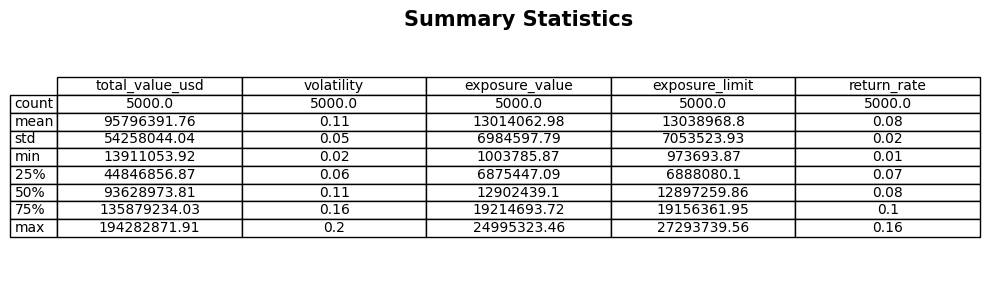

In [ ]:
desc = df.describe(include=["float"]).round(2)
plt.figure(figsize=(10, 3))
plt.table(
    rowLabels=desc.index,
    colLabels=desc.columns,
    cellText=desc.values,
    loc="center",
    cellLoc="center",
)
plt.title("Summary Statistics", fontsize=15, fontweight="bold", loc="center")
plt.axis("off")
plt.tight_layout()
plt.show()